In [ ]:
# 라이브러리를 임포트
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset


In [23]:
# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# X_train
# len(X_test)  120, 30

30

In [18]:
# PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoader 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
# train_loader : 데이터셋을 배치 크기인 16으로 나누고, 각 에포크 시작 시 데이터를 셔플
# inputs는 모델의 입력 데이터를 담고 있고, labels는 해당 데이터의 정답 레이블

test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

# len(train_loader)
############################  훈련 데이터 셋 갯수, 배치 사이즈 갯수, 배치 수를 확인, 계산해 보세요.
############################  batch, epoch ??????????????????????


8

In [12]:
# 신경망 모델 정의
# 모델은 입력층, 은닉층(1EA), 출력층으로 구성
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 64) # 입력층에서 은닉층으로  Fc Fully Connected
               ############### 4?
               ############### nn.Linear ????
        self.fc2 = nn.Linear(64, 3) # 은닉층에서 출력층으로
               ############### 3?
        self.relu = nn.ReLU() # 활성화 함수 ReLU, 은닉층에서의 활성화 함수
               ################ 출력층의 활성화 함수는?

    def forward(self, x):
        x = self.relu(self.fc1(x)) # 은닉층<->은닉층 사이 and 은닉층<->출력층사이에 ReLU 활성화 함수 적용 -> 비선형성 도입
              # 입력 데이터 x가 첫 번째 은닉층 self.fc1을 통과한 후 그 결과에 ReLU 활성화 함수 self.relu를 적용
              # 첫 번째 은닉층의 각 노드에서 계산된 선형 조합(가중치와 입력 데이터의 곱의 합)에 ReLU를 적용함으로,
                  # 다음 층으로 전달되는 신호는 비선형적인 특성을 지님
        x = self.fc2(x)  # 출력층
        return x

################### 위 신경망 구조를 간단히 스케치 해보세요.
################### 편향(bias)은?
# self.fc1 = nn.Linear(4, 64, bias=True)
# 초기값은 작은 무작위 값. 학습 가능한 매개변수. 학습 과정에서 경사 하강법을 통해 최적화

# 은닉층 추가
# class IrisNet(nn.Module):
#     def __init__(self):
#         super(IrisNet, self).__init__()
#         self.fc1 = nn.Linear(4, 64)  # 입력층에서 첫 번째 은닉층으로
#         self.fc2 = nn.Linear(64, 128) # 첫 번째 은닉층에서 두 번째 은닉층으로
#         self.fc3 = nn.Linear(128, 3)  # 두 번째 은닉층에서 출력층으로
#         self.relu = nn.ReLU()  # 활성화 함수로 ReLU 사용

#     def forward(self, x):
#         x = self.relu(self.fc1(x))  # 첫 번째 은닉층과 ReLU 활성화 함수 적용
#         x = self.relu(self.fc2(x))  # 두 번째 은닉층과 ReLU 활성화 함수 적용
#         x = self.fc3(x)  # 출력층
#         return x



In [15]:
# 모델, 손실 함수, 최적화 방법을 설정
model = IrisNet()
criterion = nn.CrossEntropyLoss() # 다중 클래스 분류를 위한 크로스 엔트로피 손실 함수 (손실 함수 내에서 자동으로 softmax 함수 적용)
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam 최적화 방법
# 편향 확인
# print("Bias of first hidden layer:", model.fc1.bias.data)
# 가중치 확인
# print("Weight of first hidden layer:", model.fc1.weight.data)

In [3]:
# 모델 학습
for epoch in range(100):
    for inputs, labels in train_loader:
        optimizer.zero_grad() # 기울기를 0으로 초기화
        outputs = model(inputs) # 순전파
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 매개변수 갱신


In [5]:
# 모델 학습
for epoch in range(100):
    total_loss = 0.0  # epoch 별 총 손실
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # 기울기를 0으로 초기화
        outputs = model(inputs)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파를 통해 기울기 계산
        optimizer.step()  # 매개변수 갱신.
        total_loss += loss.item()  # 현재 배치의 손실을 더함.

    # 평균 손실 출력 (10번의 에포크마다 한 번씩)
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}')



Epoch 10, Loss: 0.0403346864040941
Epoch 20, Loss: 0.03972732651163824
Epoch 30, Loss: 0.0425418492523022
Epoch 40, Loss: 0.04160506249172613
Epoch 50, Loss: 0.03872662899084389
Epoch 60, Loss: 0.03877478989306837
Epoch 70, Loss: 0.03804424749978352
Epoch 80, Loss: 0.037584605808660854
Epoch 90, Loss: 0.03738976444947184
Epoch 100, Loss: 0.03885439014993608


In [21]:
# 모델 평가 진행
model.eval() # 모델 평가 모드
with torch.no_grad(): # 기울기 계산 없음(평가시에는 모델 업데이트를 하지 않으므로)
    total = 0    # 전체 샘플의 수 초기값 0
    correct = 0  # 올바르게 예측된 샘플수 초기값 0
    for inputs, labels in test_loader:  # 테스트 데이터셋에서 배치 단위로 입력 데이터(inputs)와 정답 레이블(labels) 호출
        outputs = model(inputs) # 현재 배치의 입력 데이터를 모델에 전달, 예측 수행합니다. 클래스에 대한 모델의 예측 확률(점수) 리턴
        _, predicted = torch.max(outputs.data, 1) # torch.max() 함수를 통해 예측 확률이 가장 높은 클래스의 인덱스를 가져옴.
           # torch.max()두 개의 값 리턴. 1 각 행(또는 열)의 최대값 2 : 해당 최대값의 인덱스
           # '_' 변수명... 관계적으로 관심이 없는 값을 받기 위해 사용하는 변수명
           # 1: 최대값을 찾을 차원 지정(각 행에 대해 최대값을 찾도록 지시하는 옵션 값, 열은 0)
           # predicted : 모델이 예측한 클래스의 인덱스
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test set: %d %%' % (100 * correct / total))
# _


Accuracy of the network on the test set: 30 %


tensor([-0.0784,  0.2907,  0.1103,  0.0116,  0.2567, -0.0513,  0.2108,  0.0228,
        -0.1944, -0.0279,  0.2319, -0.1231,  0.2987,  0.2837])

클래스 인덱스 및 꽃종 <br>
0: Iris-setosa<br>
1: Iris-versicolor<br>
2: Iris-virginica

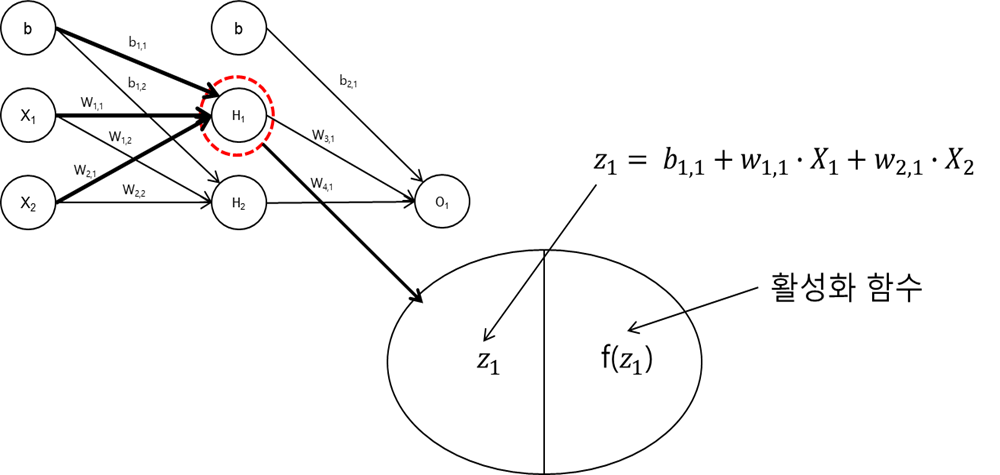

**nn.Linear**<br><br>
 PyTorch에서 제공하는 클래스, 완전 연결(fully connected) 선형(linear) 레이어를 의미 <br>
 self.fc1 = nn.Linear(4, 64)<br>
 'Linear' :  이 레이어가 선형 변환을 수행한다는 의미<br>
각 노드의 출력은 입력 데이터와 노드의 가중치의 선형 조합으로 계산<br>
비선형성은???????????????
<br><br>
선형 조합 수학식:<br>
y=Wx+b <br>
x 입력 벡터<br>
W 가중치 행렬<br>
y 출력 벡터<br>
b 편향 벡터
<br>
<br>
(4, 64) 입력 특성의 수와 출력 특성의 수 <br>
입력층에 4개의 노드(특성) <br>
첫 번째 은닉층에 64개의 노드 생성<br>
각 입력 특성에 대해 64개의 가중치 + 하나의 편향 값<br>
입력 데이터에 대해 64차원의 출력 벡터를 생성
<br><br>
nn.Linear 레이어는 각 노드(뉴런)에 대해 입력 데이터와 가중치의 곱의 합을 계산하여  최종 출력 생성

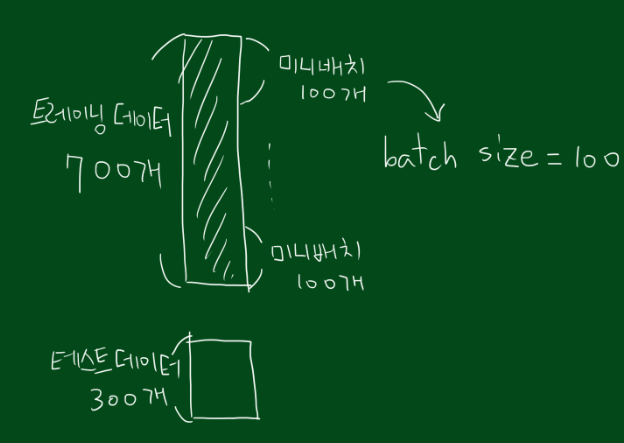

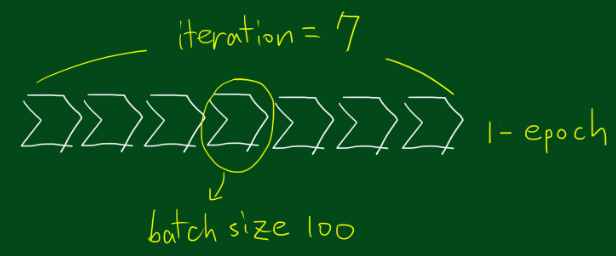